In [1]:
from useful_functions import *
from emceeHammer import *
import ast
from varname import nameof
savePNG = True ## Changes matplotlib backend to save plots as pgf (default:True)
if savePNG:
    mpl.use("agg")
    plotExt = str('.png')
elif not savePNG:
    mpl.use("pgf")
    mpl.rcParams.update({
        "pgf.texsystem": "pdflatex",
        'font.family': 'serif',
        'text.usetex': True,
        'pgf.rcfonts': False,})
    plotExt = str('.pgf')

notebookPlotFlag = True ## Changes Jupyter plotting backend (default:True)
if notebookPlotFlag:
    %matplotlib notebook
elif not notebookPlotFlag:
    %matplotlib inline
np.random.seed(1006)

gzip was not found on your system! You should solve this issue for astroquery.eso to be at its best!
On POSIX system: make sure gzip is installed and in your path!On Windows: same for 7-zip (http://www.7-zip.org)!


In [2]:
tess_2020bpi = pd.read_csv('JhaData/TESS_SN2020bpi.csv')[::2]
tess_2020bpi['mjd_0'] = tess_2020bpi['mjd'] - tess_2020bpi['mjd'].min()
fluxNorm = 0.4*np.max(tess_2020bpi['flux'])
#print(fluxNorm)
#tess_2020bpi.head()

In [3]:
tess_2020bpi_norm = tess_2020bpi
tess_2020bpi_norm.flux = tess_2020bpi.flux/fluxNorm
tess_2020bpi_norm.e_flux = tess_2020bpi.e_flux/fluxNorm
tess_2020bpi_norm.head()

BTJD          mjd         cts      e_cts  bkg_model  raw_flux  \
0  1870.44408  58869.94408  -5339.0302  1368.8706  1502.1435 -0.030663   
2  1870.46491  58869.96491  -6841.1413  1375.3282  1502.1435 -0.039290   
4  1870.48574  58869.98574  -2219.7583  1400.7610  1501.2344 -0.012748   
6  1870.50658  58870.00658 -10843.6913  1370.6601  1501.2344 -0.062277   
8  1870.52741  58870.02741  -9069.4821  1365.9754  1501.2344 -0.052088   

   e_raw_flux  bkg_model_flux      flux    e_flux    mjd_0  
0    0.007862        0.008627  0.031784  0.138169  0.00000  
2    0.007899        0.008627 -0.119834  0.138821  0.02083  
4    0.008045        0.008622  0.346737  0.141388  0.04166  
6    0.007872        0.008622 -0.523734  0.138350  0.06250  
8    0.007845        0.008622 -0.344651  0.137877  0.08333

In [4]:
tess_2020bpi_a = pd.read_csv('JhaData/TESS_SN2020bpi_updated.csv')
tess_2020bpi_a['mjd_0'] = tess_2020bpi_a['mjd'] - tess_2020bpi['mjd'].min()
# fluxNorm = 0.4*np.max(tess_2020bpi_a['flux'])
# print(fluxNorm)

In [5]:
tess_2020bpi_a_norm = tess_2020bpi_a
tess_2020bpi_a_norm.flux = tess_2020bpi_a.flux/fluxNorm
tess_2020bpi_a_norm.e_flux = tess_2020bpi_a.e_flux/fluxNorm
tess_2020bpi_a_norm.head()

BTJD          mjd         cts      e_cts  bkg_model  raw_flux  \
0  1870.44408  58869.94408  -5339.0302  1368.8706  1472.5589 -0.030663   
1  1870.46491  58869.96491  -6841.1413  1375.3282  1472.5589 -0.039290   
2  1870.48574  58869.98574  -2219.7583  1400.7610  1472.5589 -0.012748   
3  1870.50658  58870.00658 -10843.6913  1370.6601  1472.5589 -0.062277   
4  1870.52741  58870.02741  -9069.4821  1365.9754  1472.5589 -0.052088   

   e_raw_flux  bkg_model_flux      flux    e_flux    mjd_0  
0    0.007862        0.008457  0.007401  0.138746  0.00000  
1    0.007899        0.008457 -0.144851  0.139401  0.02083  
2    0.008045        0.008457  0.323565  0.141979  0.04166  
3    0.007872        0.008457 -0.550542  0.138928  0.06250  
4    0.007845        0.008457 -0.370712  0.138453  0.08333

In [6]:
ztf_2020bpi = pd.read_csv('JhaData/ztf_SN2020bpi.csv')
ztf_2020bpi['mjd_0'] = ztf_2020bpi['mjd'] - tess_2020bpi['mjd'].min()
## Note: setting the zero value of mjd_0 to that of TESS for consitency 
ztf_2020bpi['e_flux_tuple'] = ztf_2020bpi['e_flux']
ztf_2020bpi['e_flux'] = [
    np.mean(ast.literal_eval(flux))
    for flux in ztf_2020bpi['e_flux'].to_numpy()
                        ]

ztf_2020bpi.head()

BTJD           mjd      magap  sig_magap      flux    e_flux  \
0  1879.870567  58879.370567  19.729799     0.2218  0.014224  0.002926   
1  1881.011065  58880.511065  19.959801     0.2436  0.011509  0.002604   
2  1881.031343  58880.531343  19.473101     0.1538  0.018018  0.002561   
3  1881.843854  58881.343854  19.660400     0.2291  0.015163  0.003223   
4  1882.032546  58881.532546  19.363001     0.1425  0.019941  0.002625   

       mjd_0                                    e_flux_tuple  
0   9.426487    (0.002628163767600394, 0.003223832161130714)  
1  10.566985  (0.0023129338055085068, 0.0028946976073013723)  
2  10.587263   (0.0023797689104727814, 0.002741920034638759)  
3  11.399774   (0.0028844699689605166, 0.003562099310207071)  
4  11.588466    (0.00245268546717093, 0.0027966740782900297)

sampling...



done


<IPython.core.display.Javascript object>


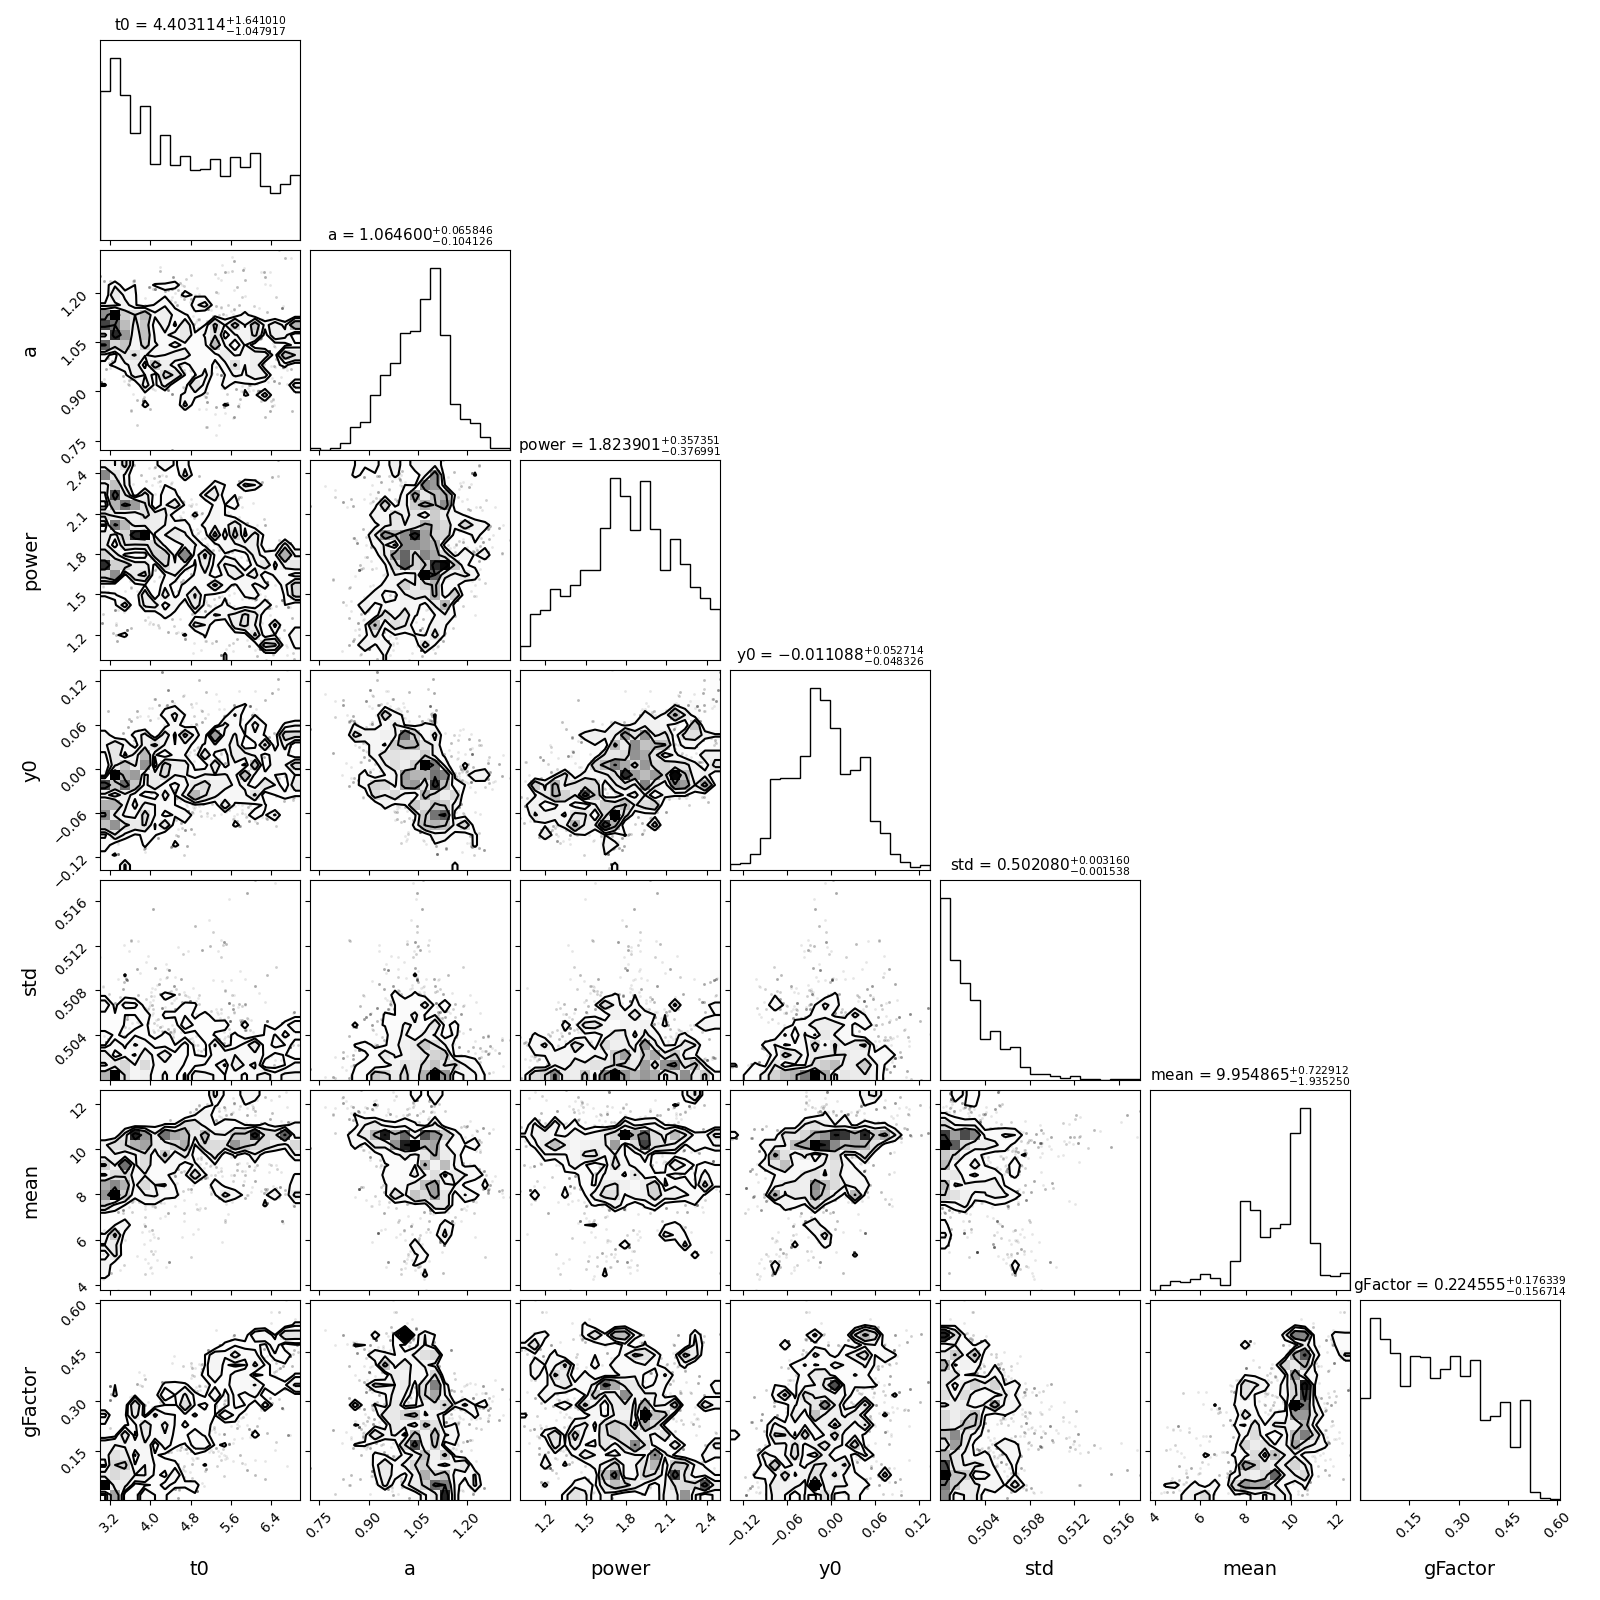

<IPython.core.display.Javascript object>


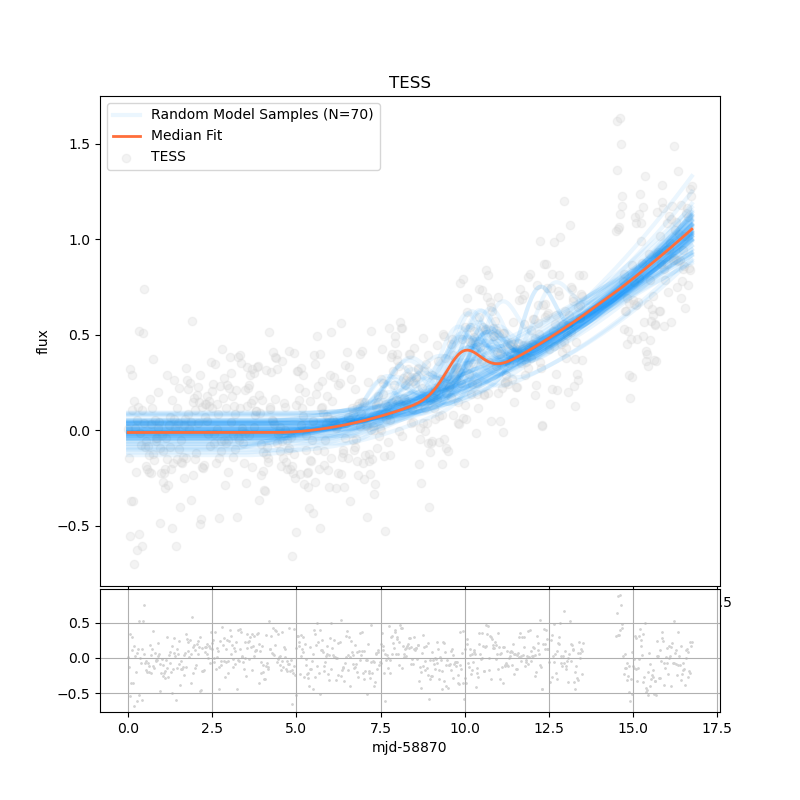

In [8]:
guess = {'t0':5.5, 'a':1.2,'power':1.8,'y0':-0.1,'std':1.5,'mean':10.65,'gFactor':0.2} 
scale = {'t0':0.5, 'a':0.2,'power':0.4,'y0':0.05,'std':0.2,'mean':0.5,'gFactor':0.05}
fits, randFits = hammerTime(tess_2020bpi_a_norm, guess, scale, 
                            cutoff=16.75, nwalkers=50,nburn=250,nsteps=500,
                            curveModel='dcGauss',
                            plotPal=('lightgrey','#008DF9','#FF6E3A'));

sampling...



done


<IPython.core.display.Javascript object>


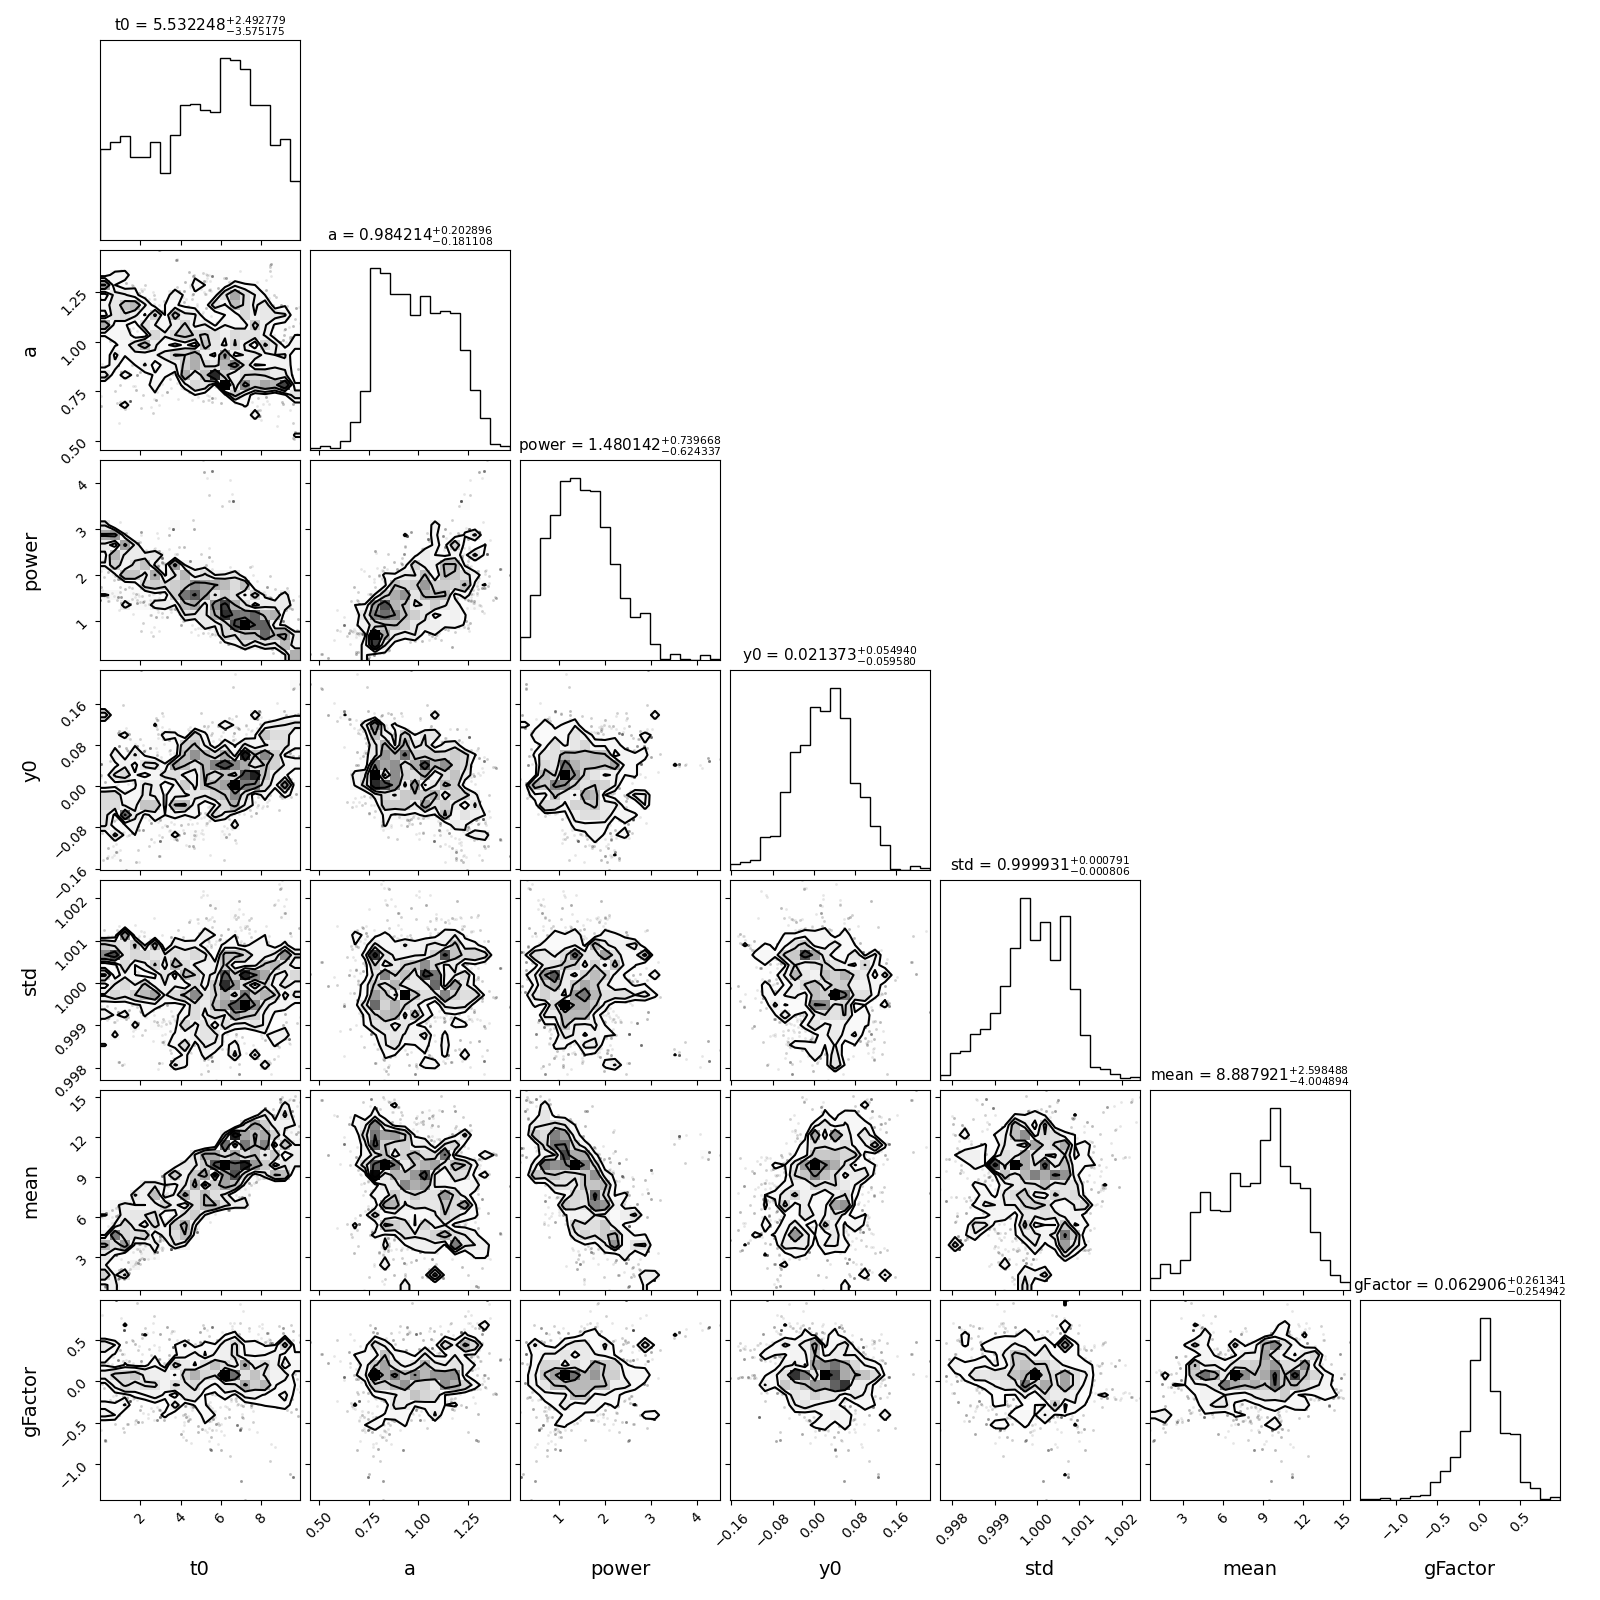

<IPython.core.display.Javascript object>


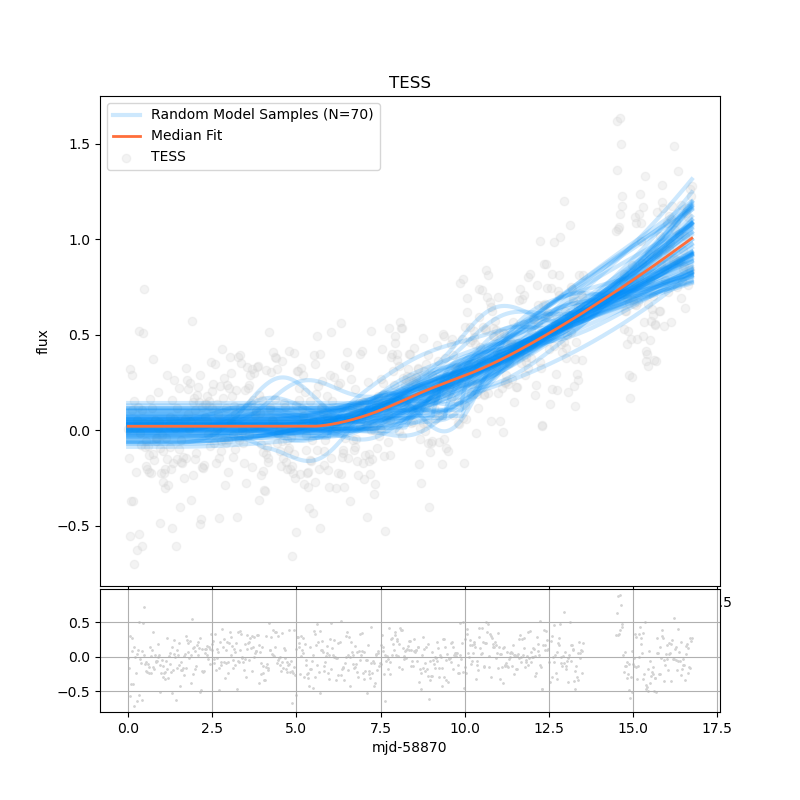

In [8]:
guess = {'t0':5.5, 'a':1.0,'power':1.8,'y0':-0.1,'std':1,'mean':10.65,'gFactor':0.06} 
scale = {'t0':0.5, 'a':0.2,'power':0.4,'y0':0.05,'std':0.2,'mean':0.5,'gFactor':0.005}
fits, randFits = hammerTime(tess_2020bpi_a_norm, guess, scale, 
                            cutoff=16.75, nwalkers=14,nburn=250,nsteps=500,
                            curveModel='dcGauss',
                            plotPal=('lightgrey','#008DF9','#FF6E3A'));

sampling...



done


<IPython.core.display.Javascript object>


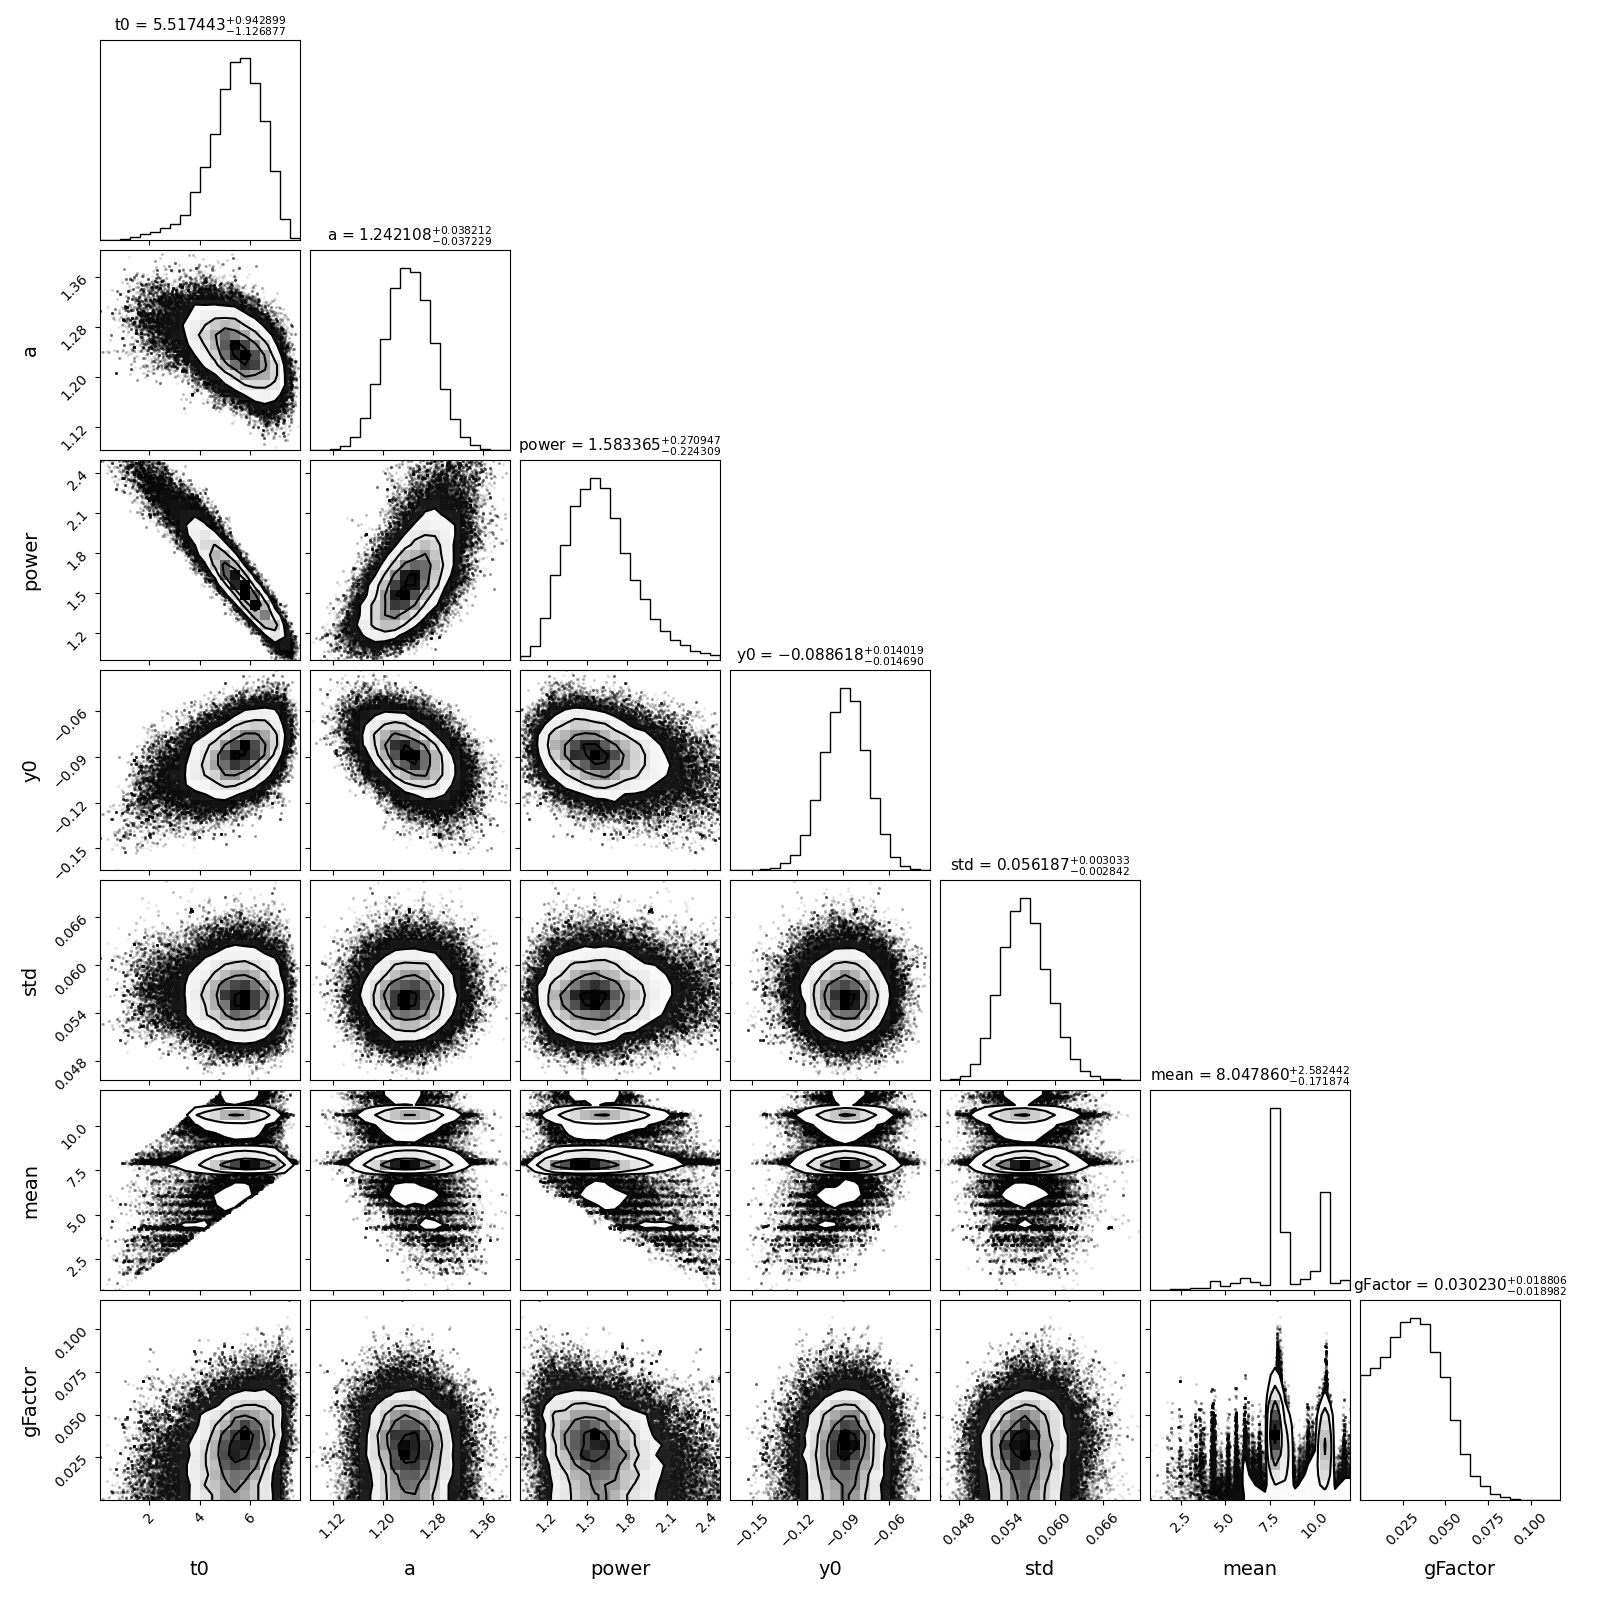

<IPython.core.display.Javascript object>


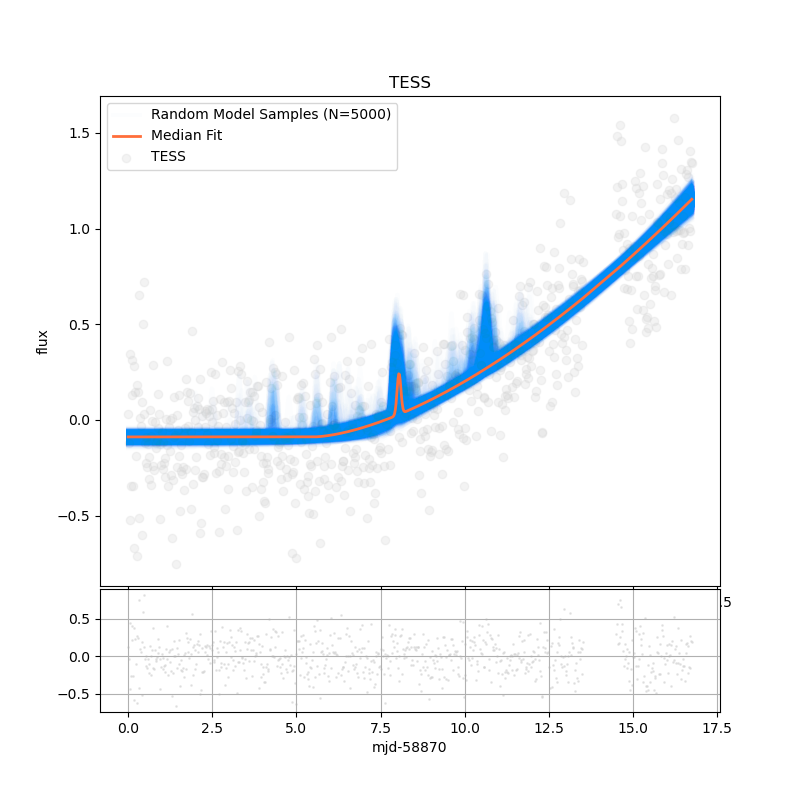

In [538]:
guess = {'t0':5.5, 'a':1.0,'power':1.8,'y0':-0.1,'std':0.1,'mean':10.65,'gFactor':0.1} 
scale = {'t0':0.5, 'a':0.2,'power':0.4,'y0':0.05,'std':0.01,'mean':0.5,'gFactor':0.02}
fits, randFits = hammerTime(tess_2020bpi, guess, scale, 
                            cutoff=16.75, nwalkers=250,nburn=500,nsteps=2000,
                            curveModel='dcGauss',
                            plotPal=('lightgrey','#008DF9','#FF6E3A'));

sampling...



done


<IPython.core.display.Javascript object>


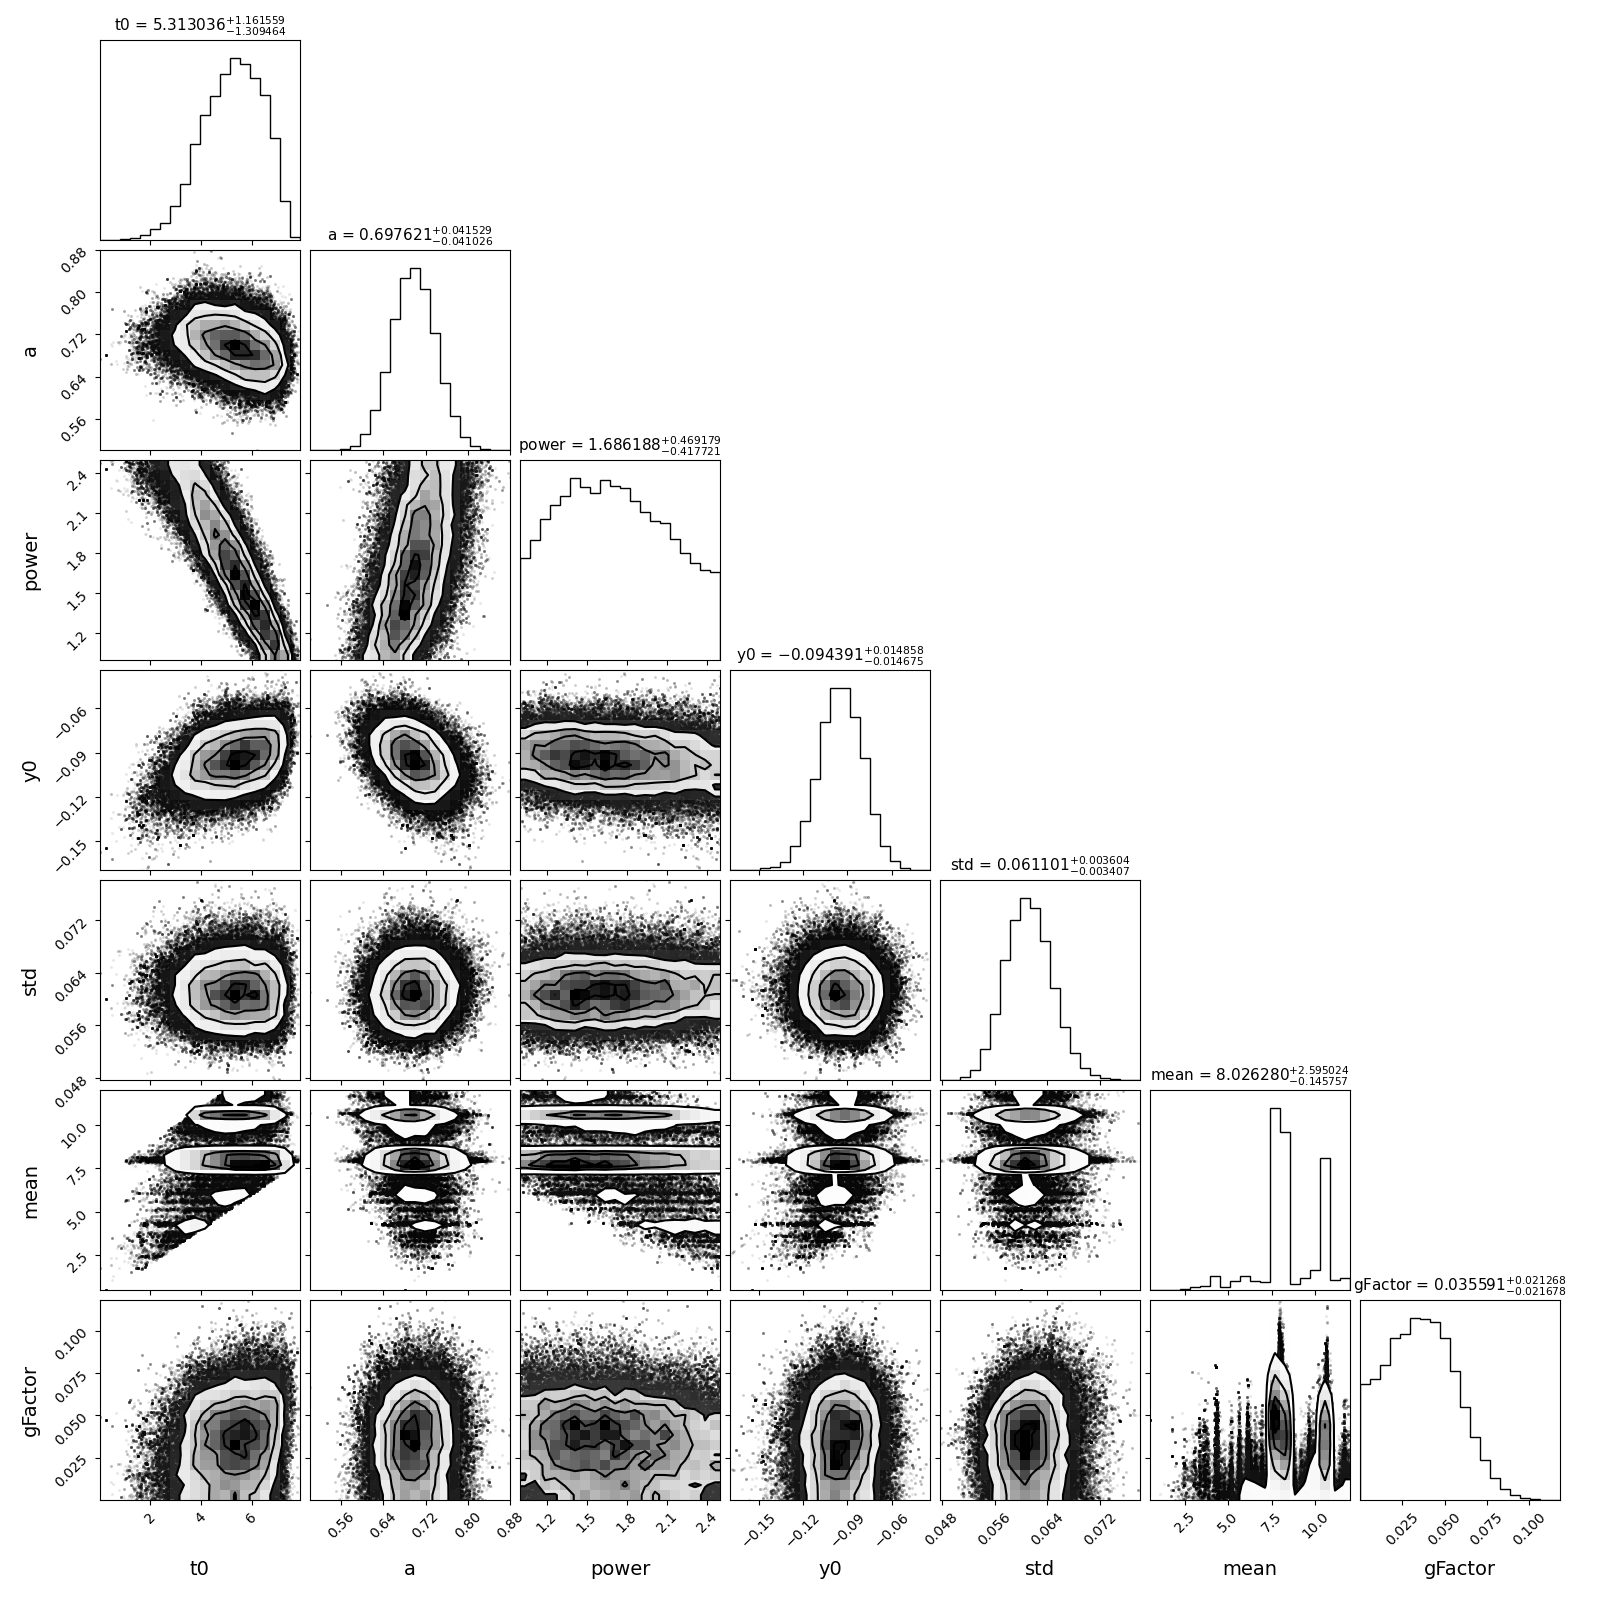

<IPython.core.display.Javascript object>


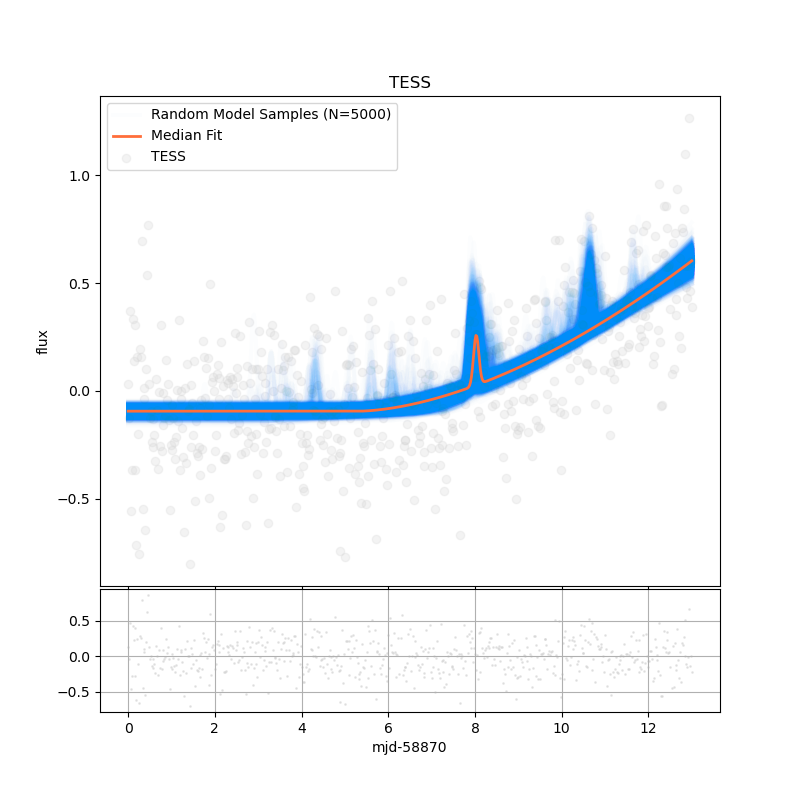

In [540]:
guess = {'t0':5.5, 'a':1.0,'power':1.8,'y0':-0.1,'std':0.1,'mean':10.65,'gFactor':0.1} 
scale = {'t0':0.5, 'a':0.2,'power':0.4,'y0':0.05,'std':0.01,'mean':0.5,'gFactor':0.02}
fits, randFits = hammerTime(tess_2020bpi, guess, scale, 
                            cutoff=13, nwalkers=250,nburn=500,nsteps=2000,
                            curveModel='dcGauss',
                            plotPal=('lightgrey','#008DF9','#FF6E3A'));

sampling...



done


<IPython.core.display.Javascript object>


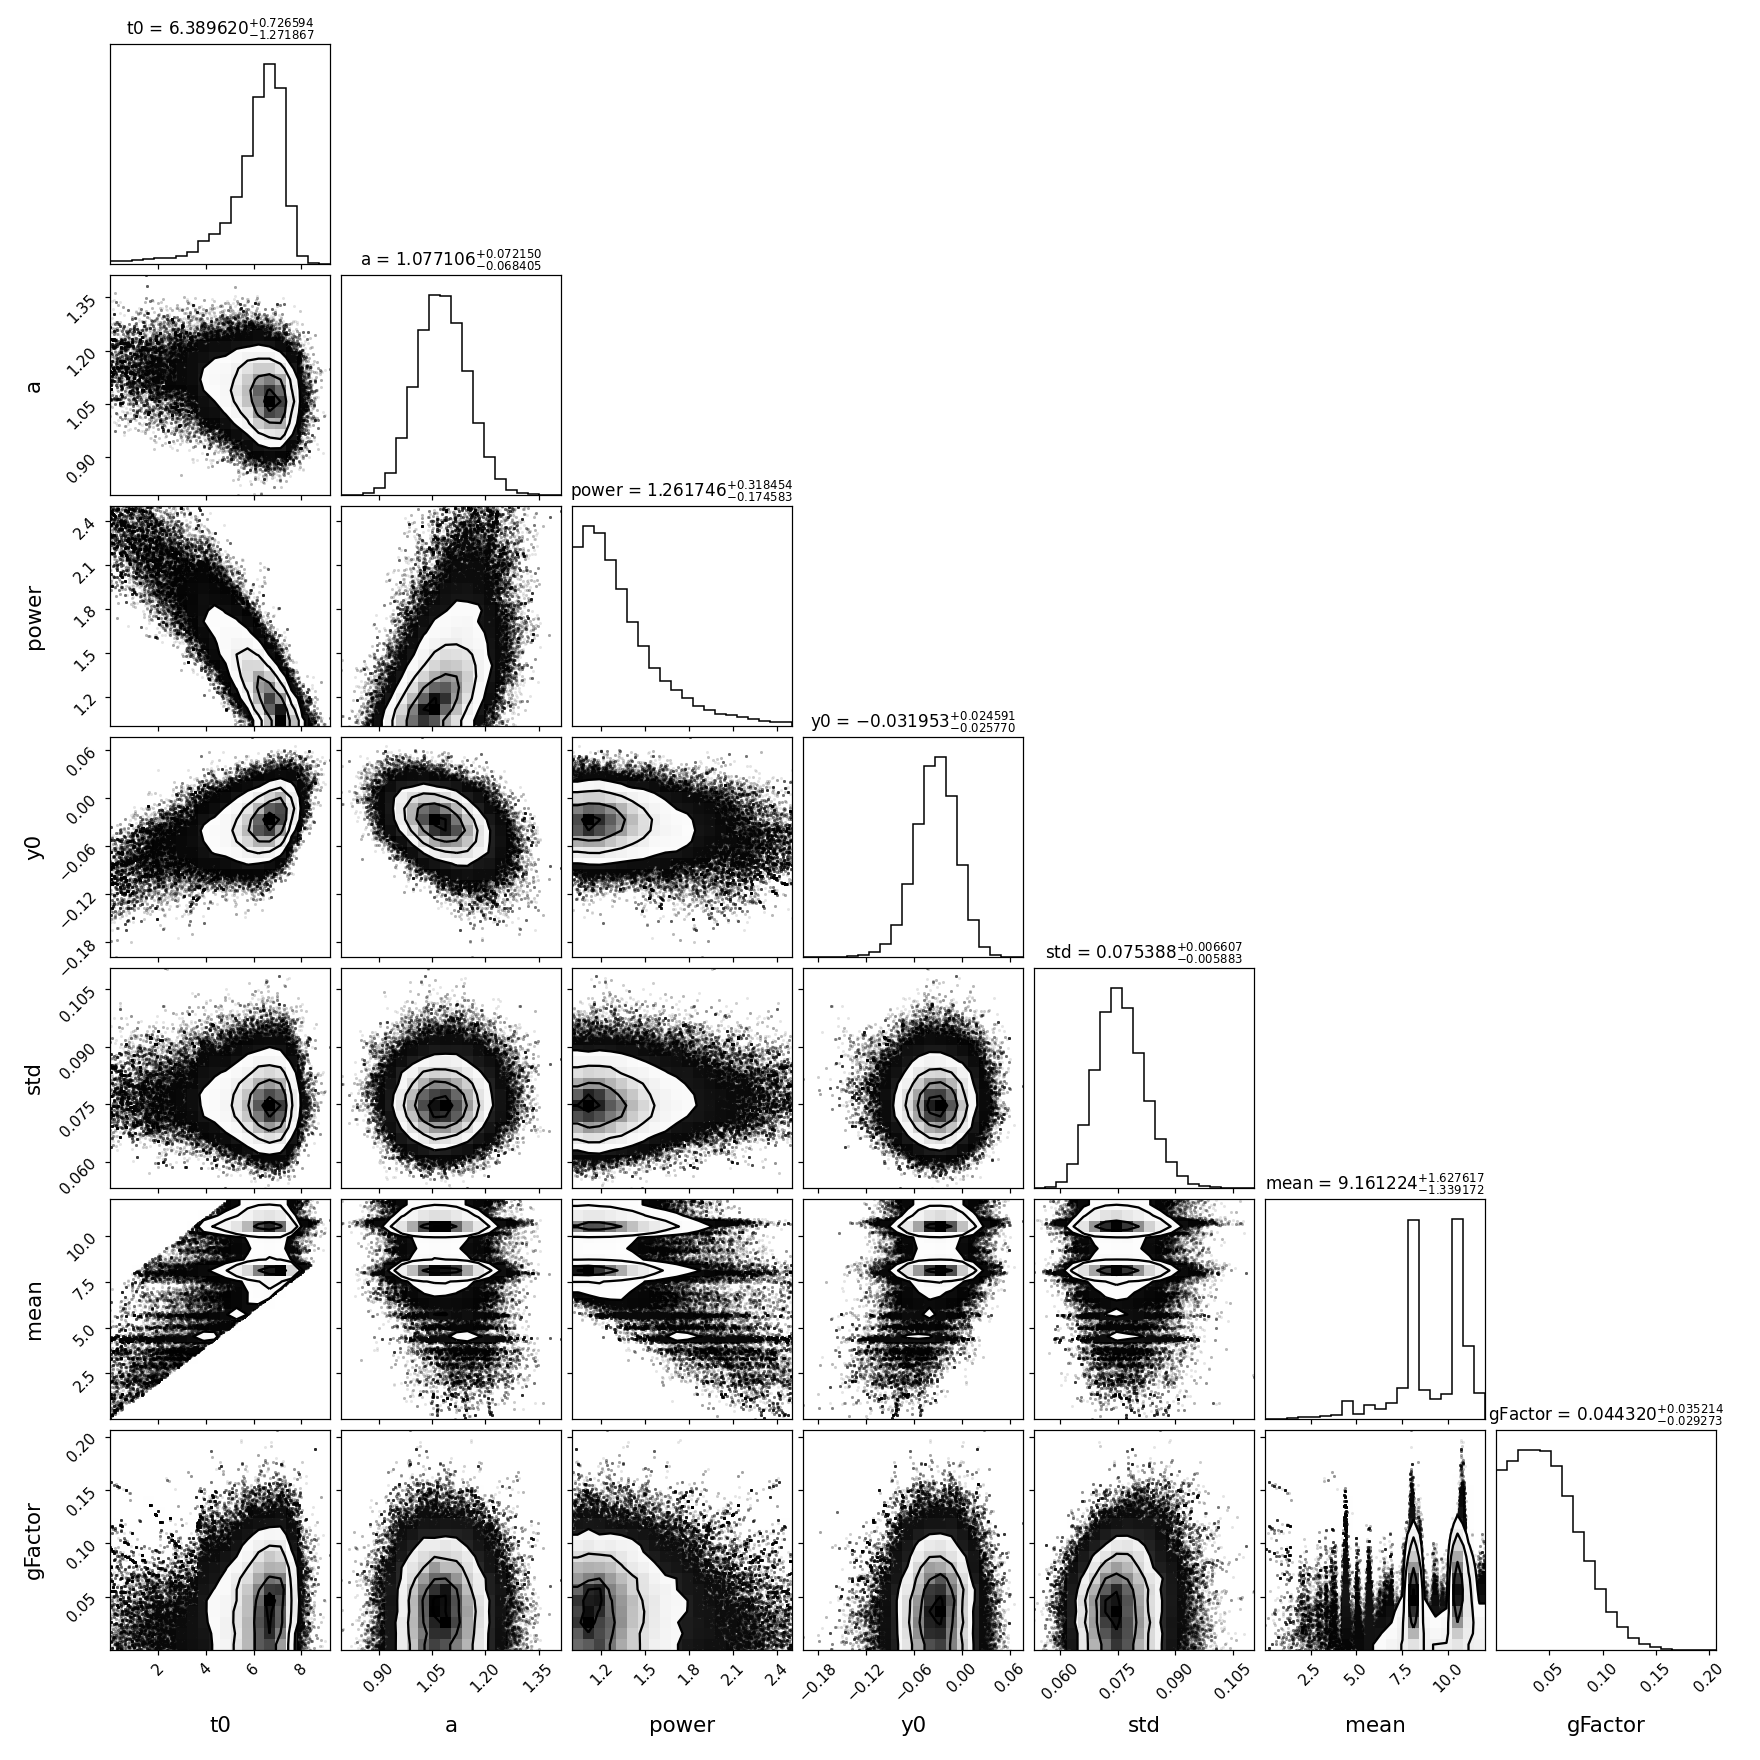

<IPython.core.display.Javascript object>


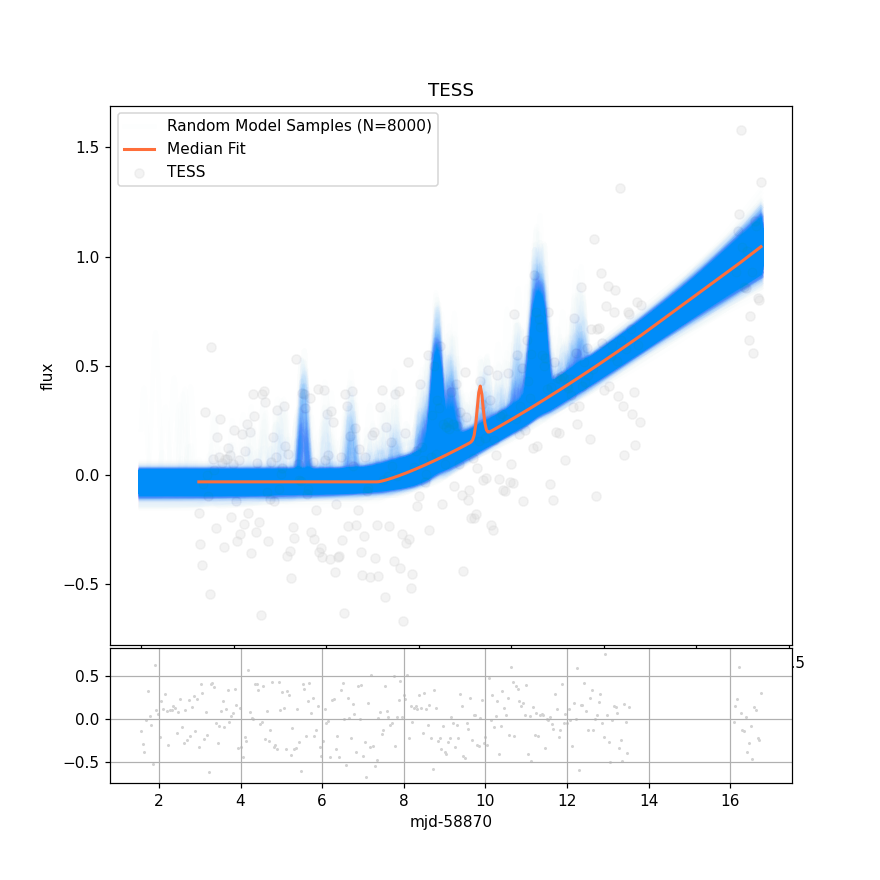

In [564]:
guess = {'t0':5.5, 'a':1.0,'power':1.8,'y0':-0.1,'std':0.1,'mean':8,'gFactor':0.1} 
scale = {'t0':0.5, 'a':0.2,'power':0.4,'y0':0.05,'std':0.01,'mean':0.5,'gFactor':0.02}
fits, randFits = hammerTime(tess_2020bpi_a, guess, scale, 
                            cutoff=16.75, nwalkers=400,nburn=500,nsteps=2000,
                            curveModel='dcGauss',
                            plotPal=('lightgrey','#008DF9','#FF6E3A'));

sampling...



done


<IPython.core.display.Javascript object>


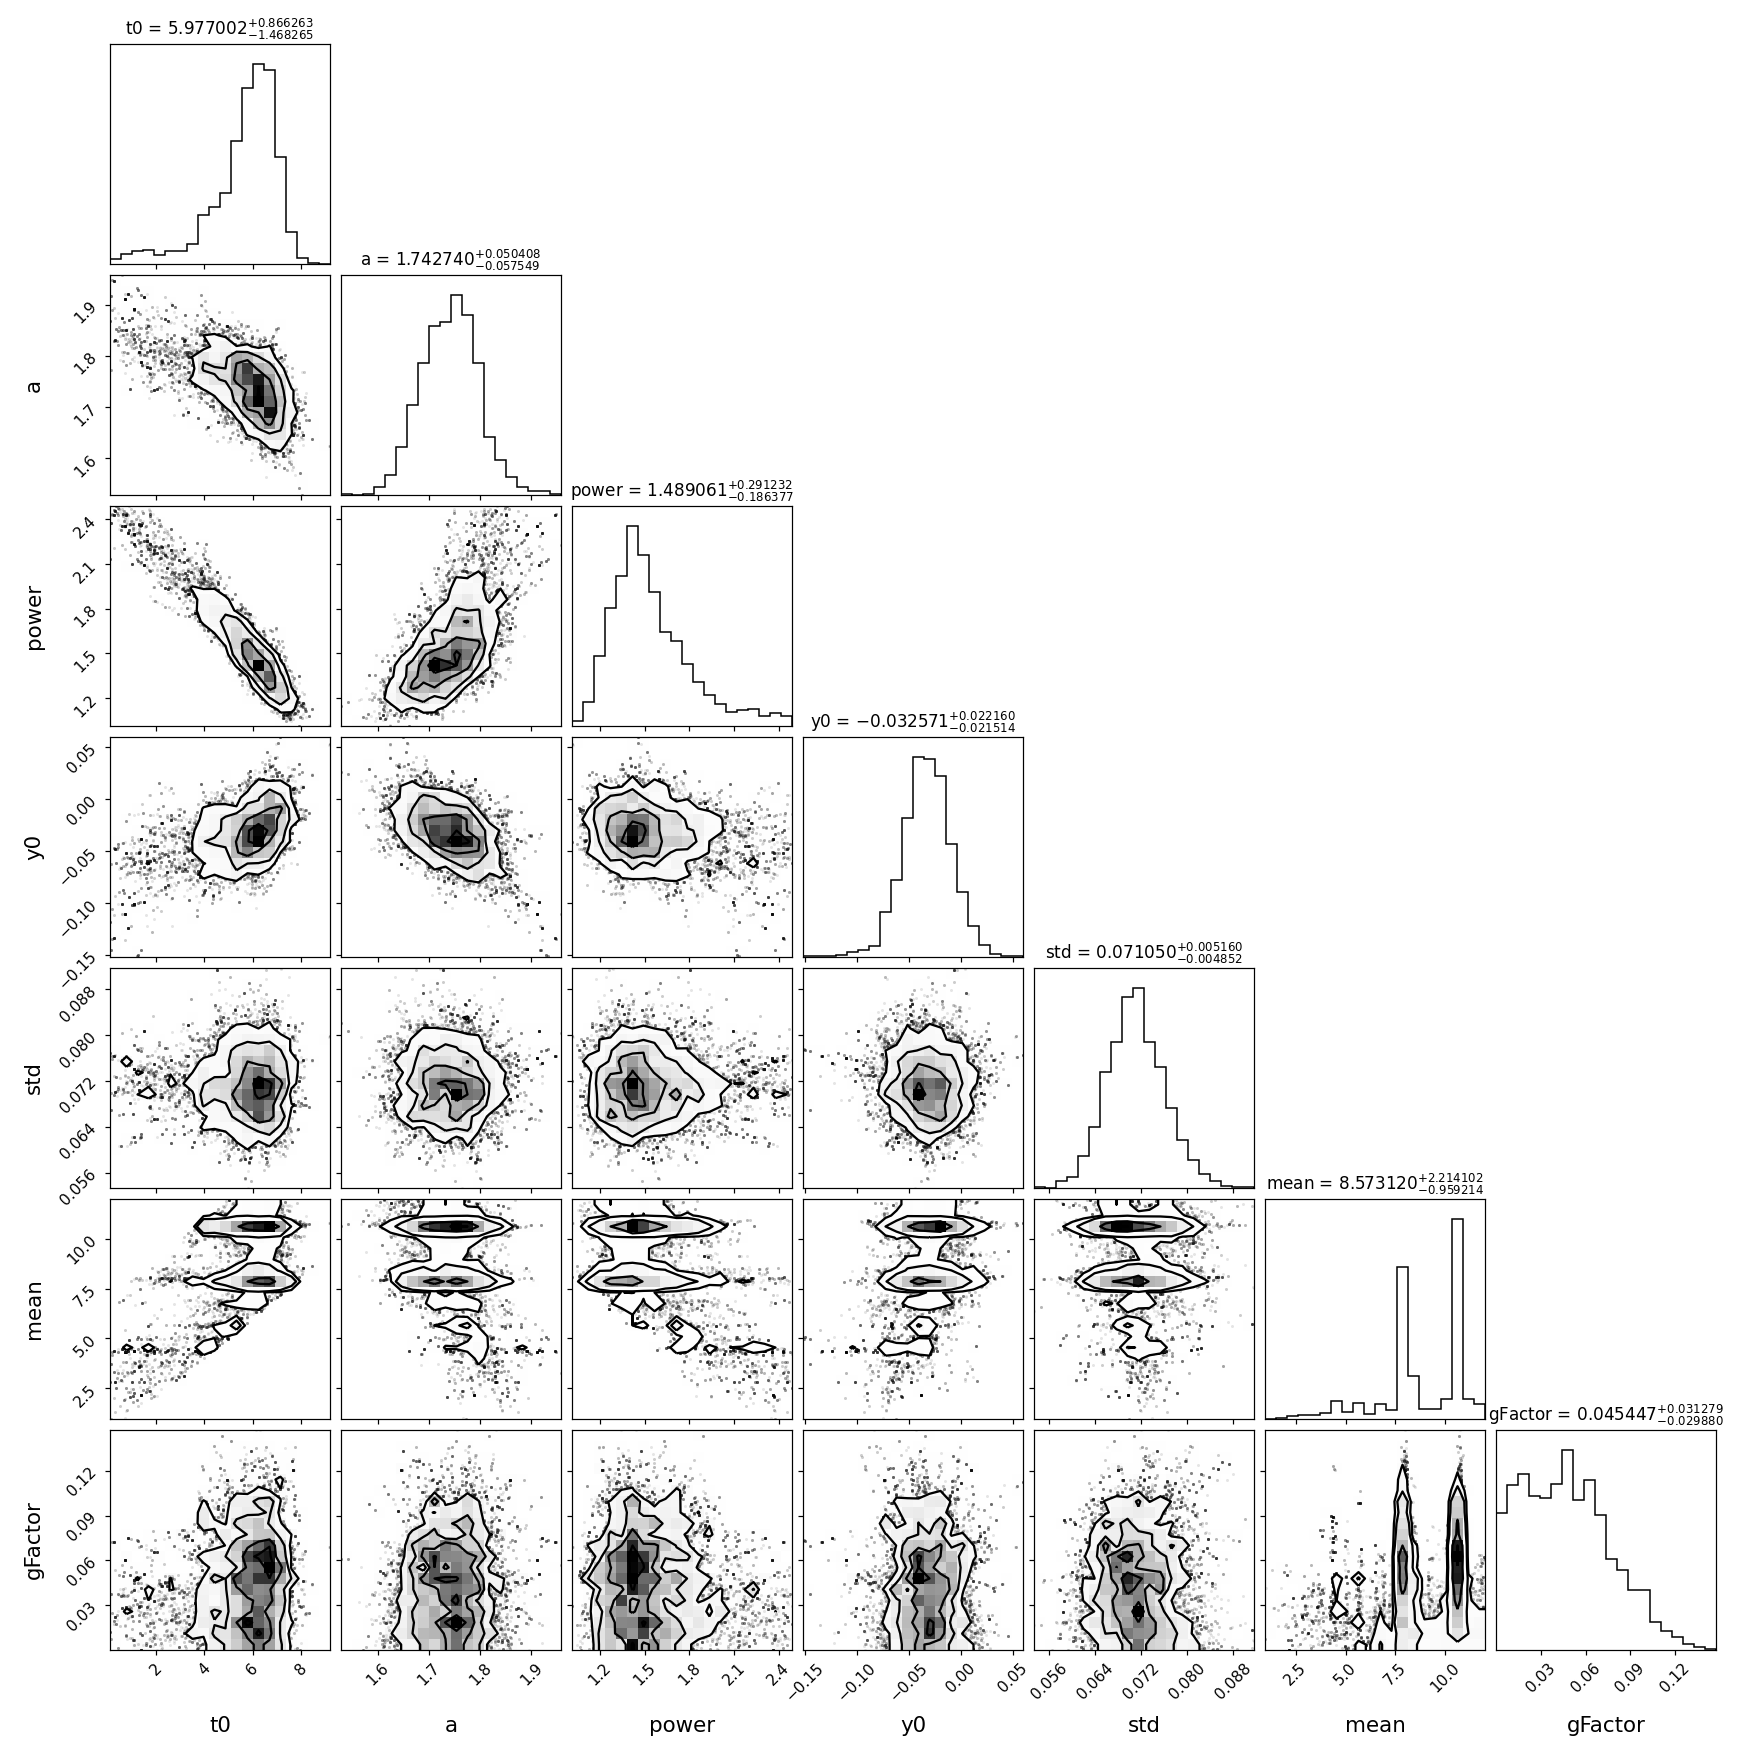

<IPython.core.display.Javascript object>


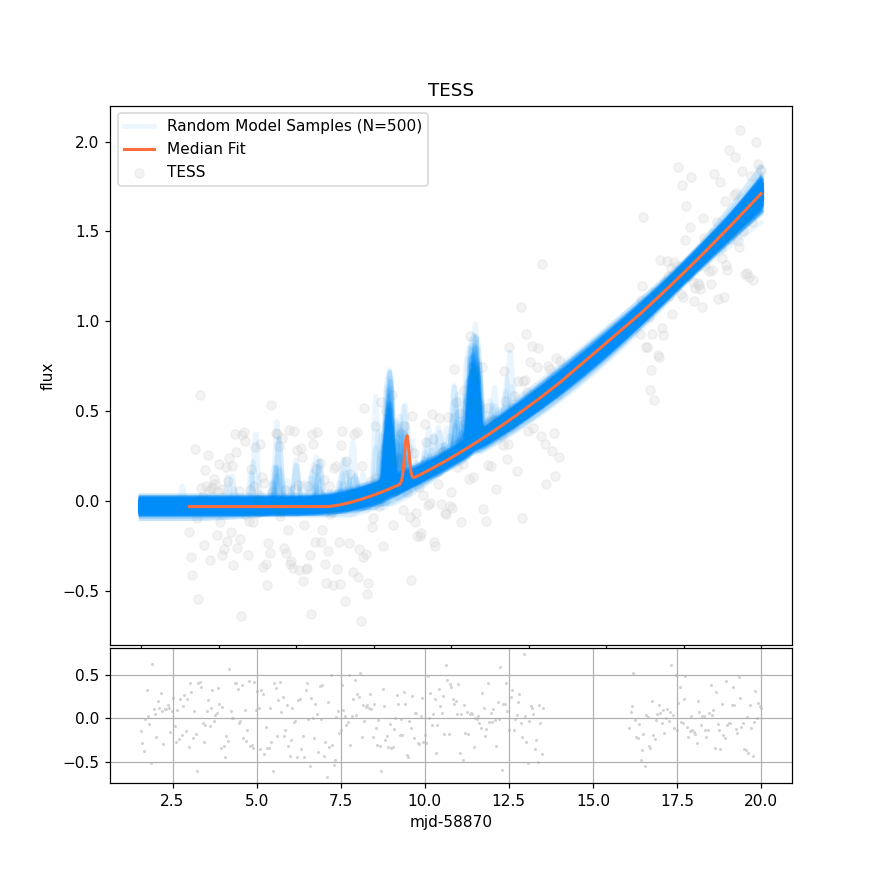

In [562]:
guess = {'t0':5.5, 'a':1.0,'power':1.8,'y0':-0.1,'std':0.1,'mean':9,'gFactor':0.1} 
scale = {'t0':0.5, 'a':0.2,'power':0.4,'y0':0.05,'std':0.01,'mean':0.5,'gFactor':0.02}
fits, randFits = hammerTime(tess_2020bpi_a, guess, scale, 
                            cutoff=20, nwalkers=50,nburn=500,nsteps=1000,
                            curveModel='dcGauss',
                            plotPal=('lightgrey','#008DF9','#FF6E3A'));

sampling...



done


<IPython.core.display.Javascript object>


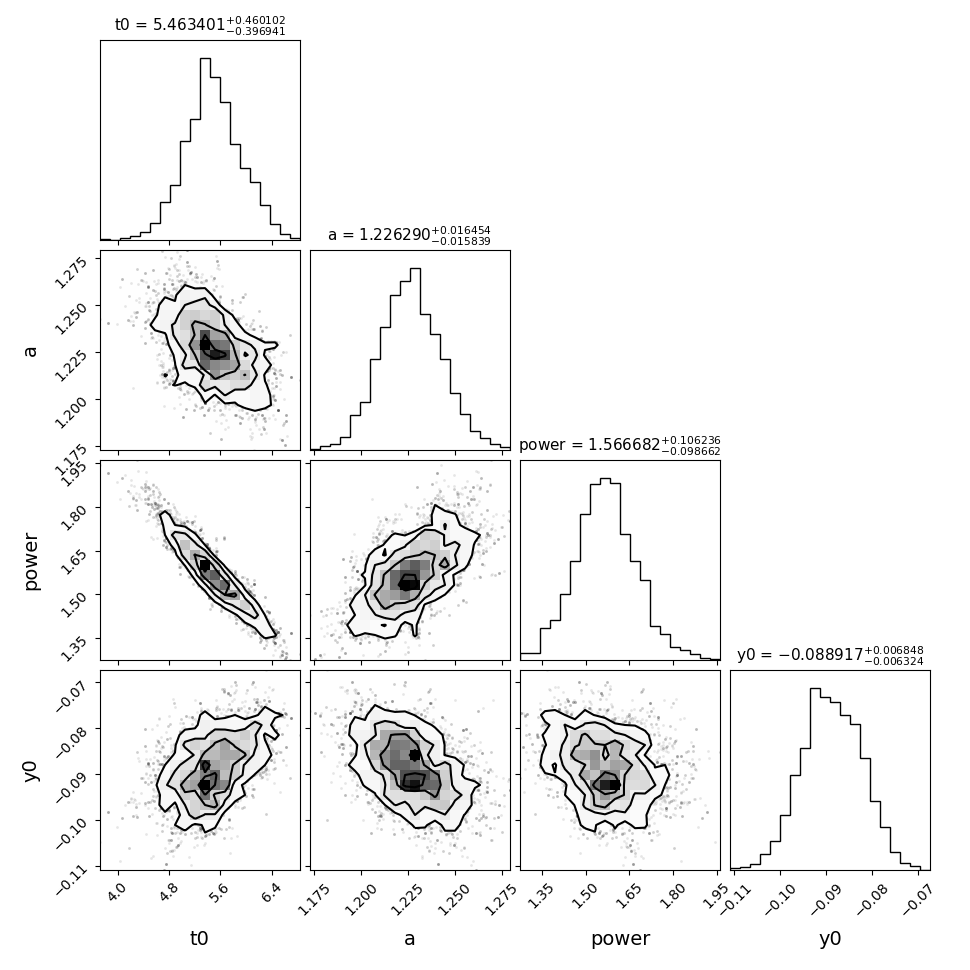

<IPython.core.display.Javascript object>


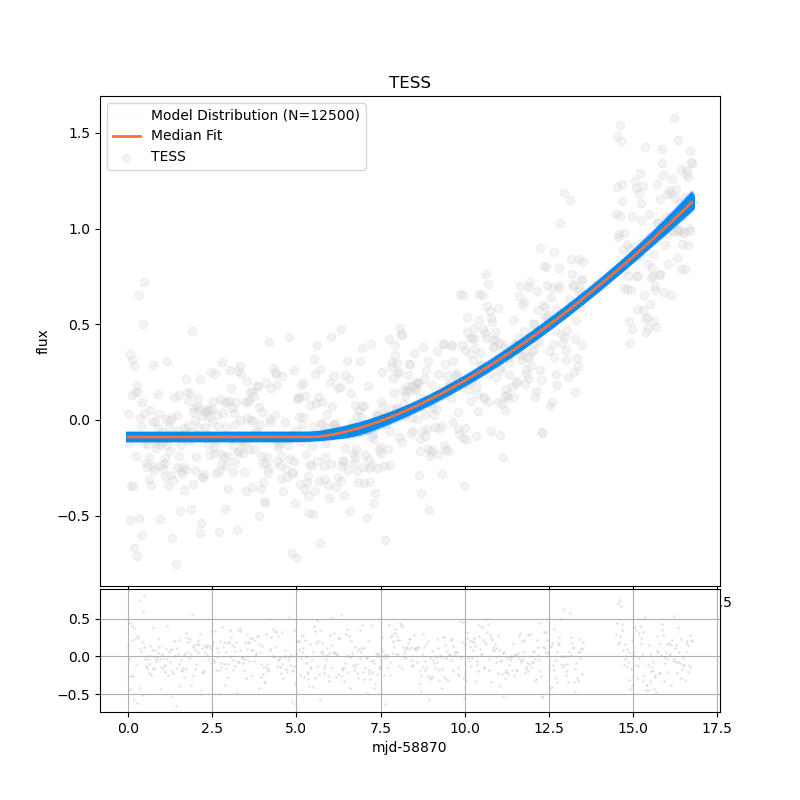

In [493]:
guess = {'t0':5.5, 'a':0.7,'power':1.5,'y0':0} 
scale = {'t0':0.5, 'a':0.1,'power':0.2,'y0':0.1}
fits, randFits = hammerTime(tess_2020bpi, guess, scale, 
                            cutoff=16.75, nwalkers=25,nburn=250,nsteps=500,
                            curveModel='decoupled',
                            plotPal=('lightgrey','#008DF9','#FF6E3A'));

sampling...



done


<IPython.core.display.Javascript object>


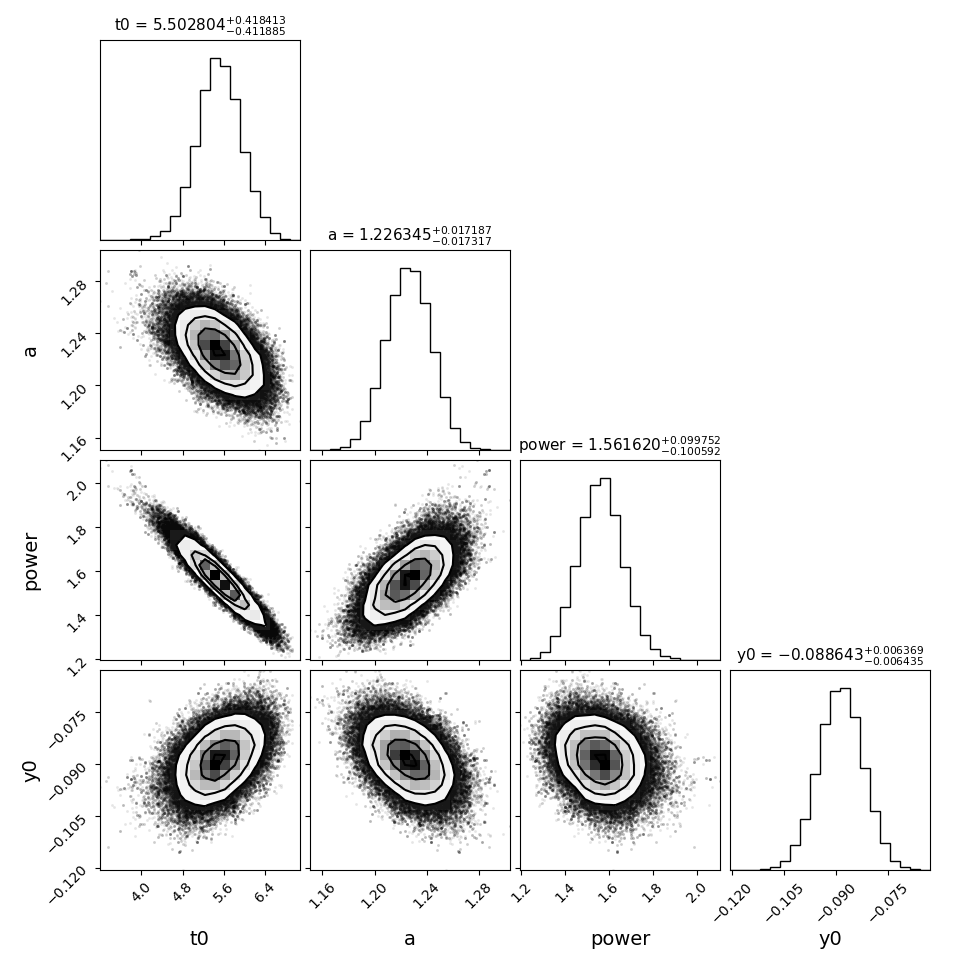

<IPython.core.display.Javascript object>


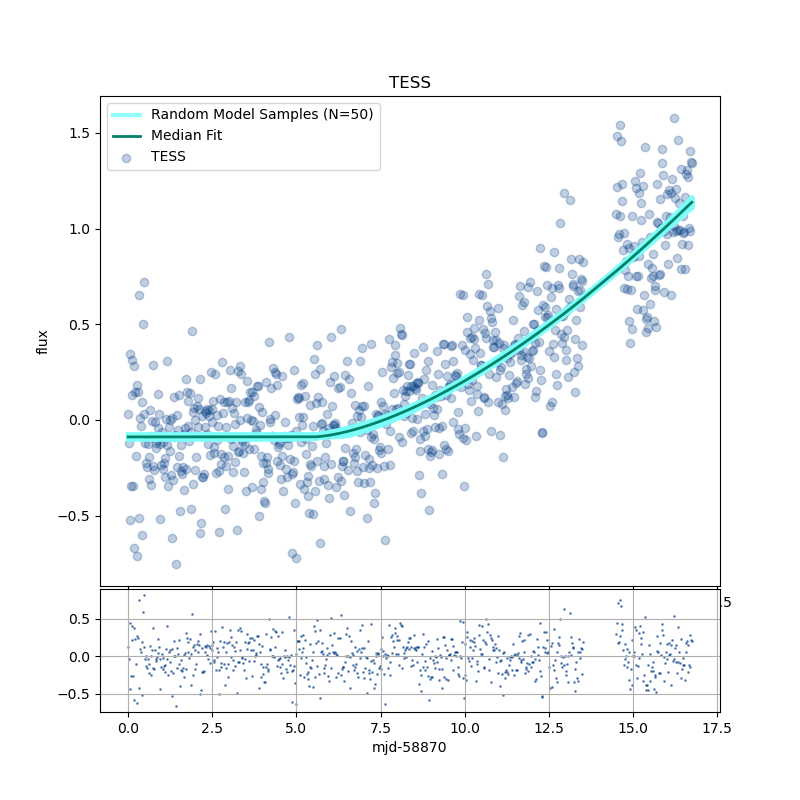

In [494]:
guess = {'t0':5.45, 'a':0.78,'power':1.58,'y0':-0.06}
scale = {'t0':0.2, 'a':0.1,'power':0.1,'y0':0.01}
hammerTime(tess_2020bpi, guess, scale, 
                cutoff=16.75, nwalkers=250,nburn=250,nsteps=1000,numModels=50,
                curveModel='decoupled');

sampling...



done


<IPython.core.display.Javascript object>


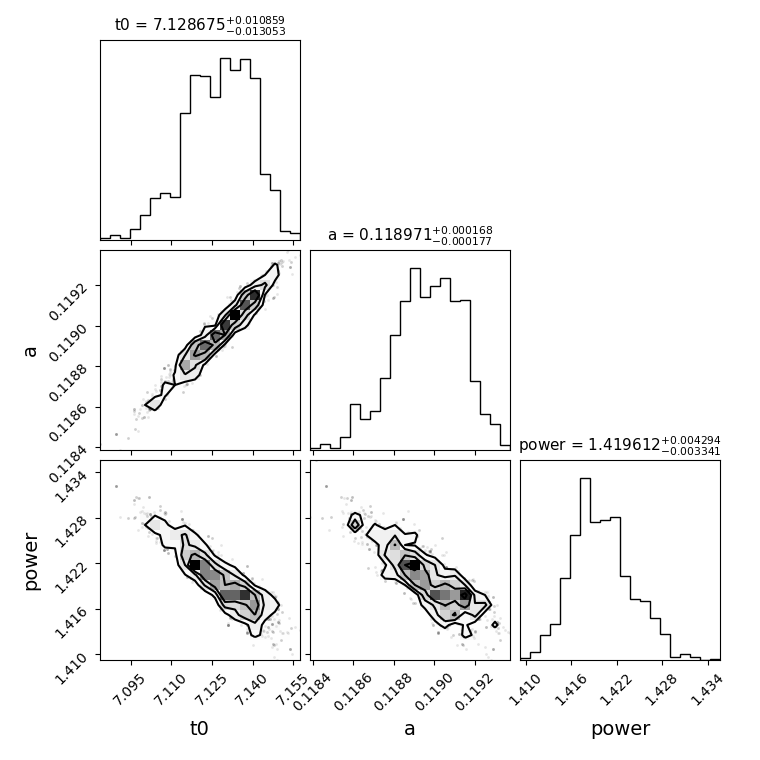

<IPython.core.display.Javascript object>


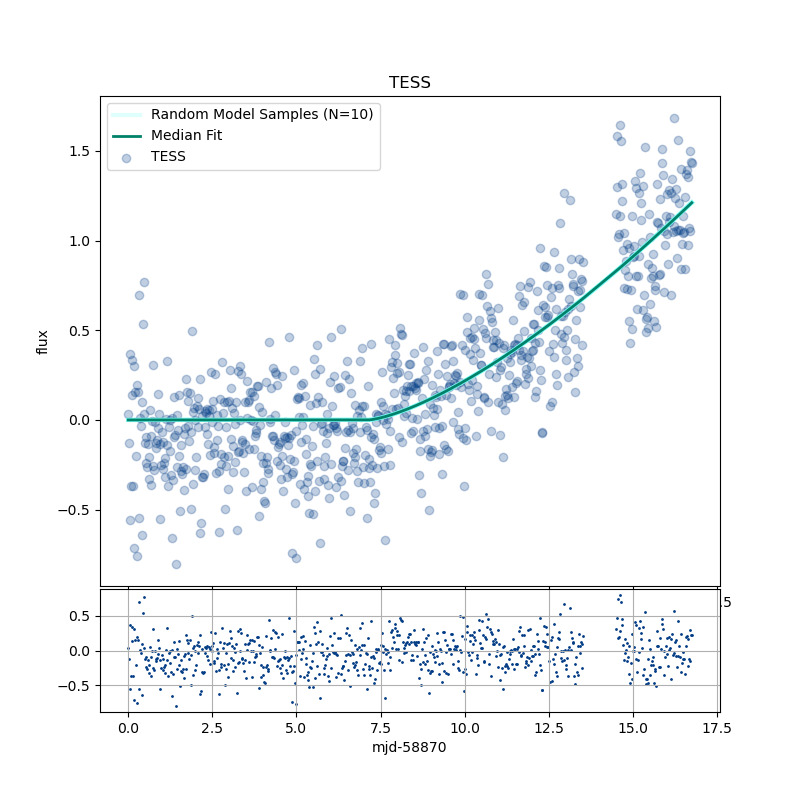

In [551]:
guess = {'t0':7.1, 'a':1,'power':1.45} 
scale = {'t0':0.2, 'a':0.1,'power':0.1}
hammerTime(tess_2020bpi, guess, scale, 
                cutoff=16.75, nwalkers=10,nburn=300,nsteps=500,numModels=10,curveModel='powerFix1');

sampling...



done


<IPython.core.display.Javascript object>


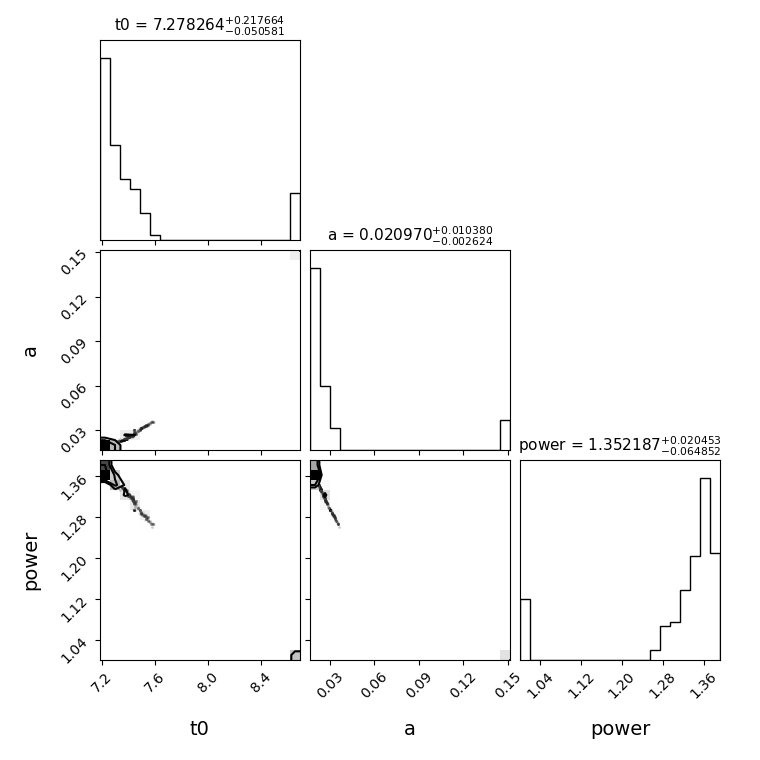

<IPython.core.display.Javascript object>


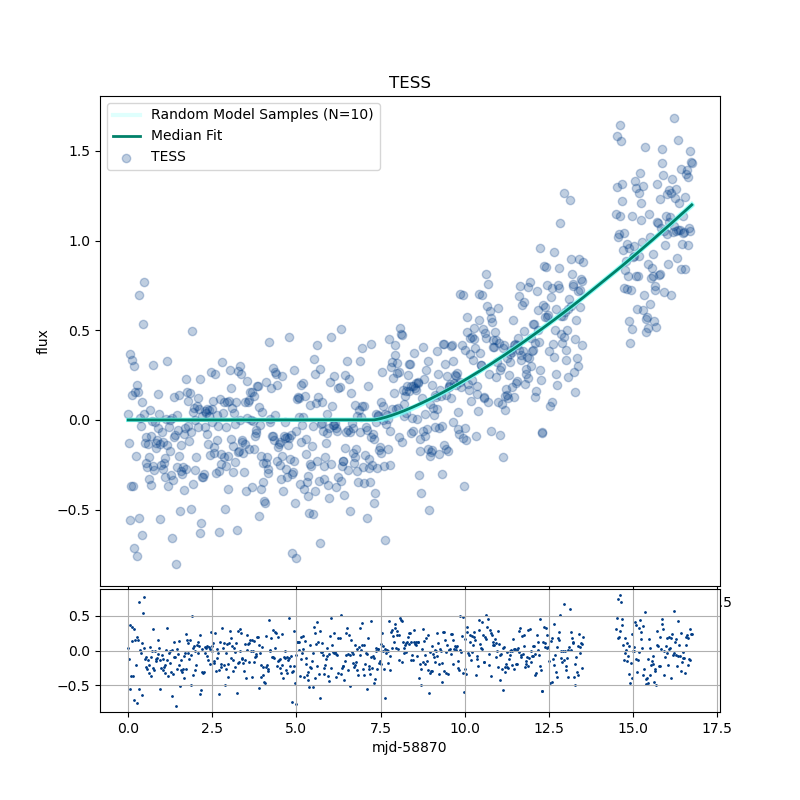

In [552]:
guess = {'t0':7.1, 'a':1,'power':1.45} 
scale = {'t0':0.2, 'a':0.1,'power':0.1}
hammerTime(tess_2020bpi, guess, scale, 
                cutoff=16.75, nwalkers=10,nburn=300,nsteps=500,numModels=10,curveModel='powerFix2');

sampling...



done


<IPython.core.display.Javascript object>


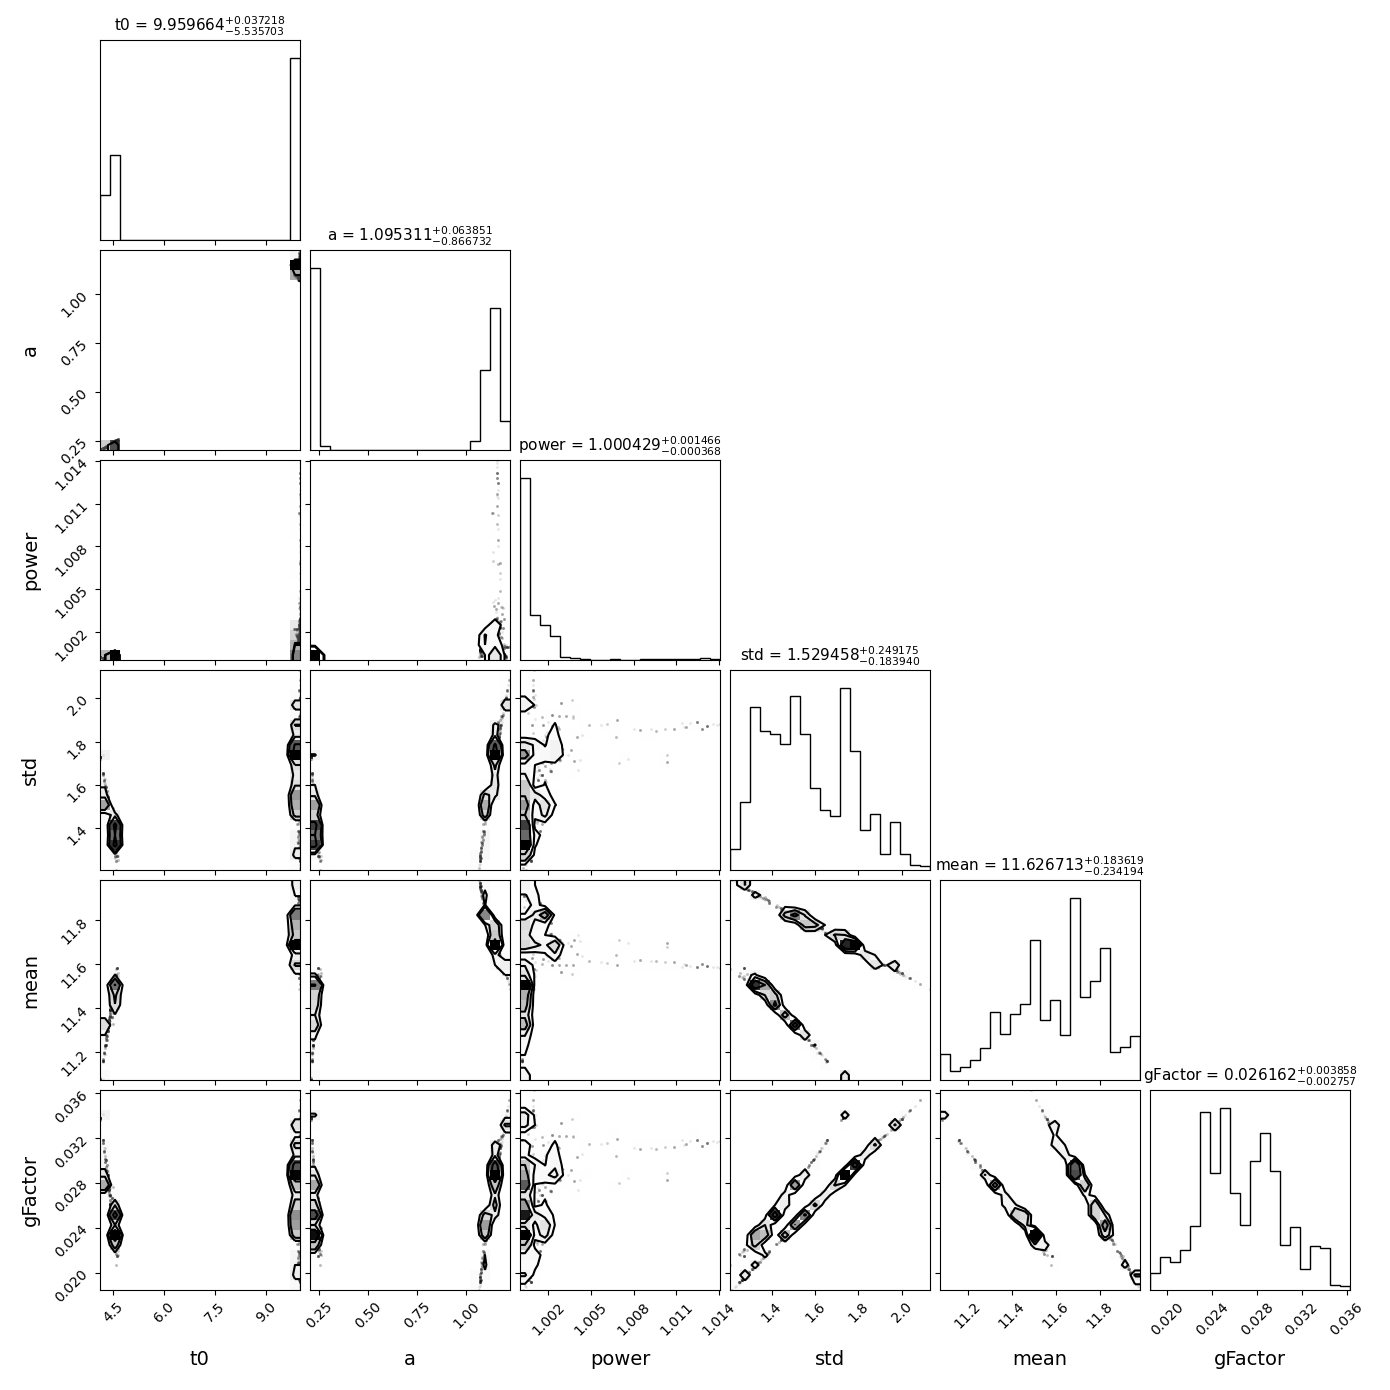

<IPython.core.display.Javascript object>


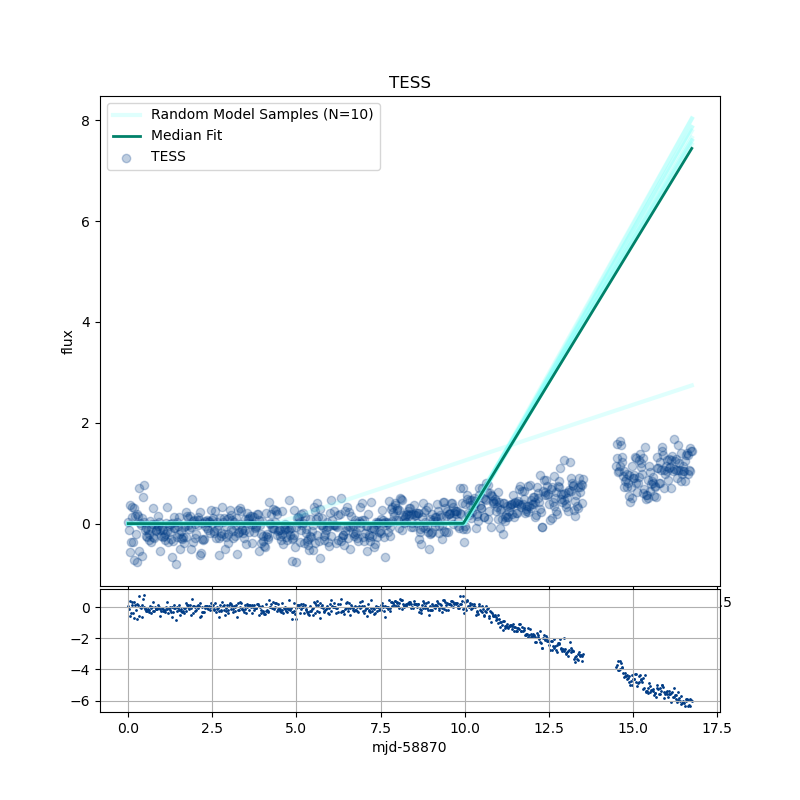

In [553]:
guess = {'t0':7.1, 'a':1,'power':1.45,'std':0.1,'mean':10.65,'gFactor':0.01} 
scale = {'t0':0.4, 'a':0.1,'power':0.2,'std':0.05,'mean':0.2,'gFactor':0.001}
hammerTime(tess_2020bpi, guess, scale, 
                cutoff=16.75, nwalkers=12,nburn=300,nsteps=500,numModels=10,curveModel='gaussian');